In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
# 实现vgg块
# num_convs 卷积层的数量 in_channels 输入通道的数量 out_channels 输出通道的数量
def vgg_block(num_convs, in_channels, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
        in_channels = out_channels
    layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
    return nn.Sequential(*layers)

In [3]:
# conv_arch 该变量指定了每个VGG块儿中卷积层的个数 和 输出通道
conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))

In [4]:
def vgg(conv_arch):
    conv_blks = []
    in_channels = 1
    # 卷积层部分
    for (num_convs, out_channels) in conv_arch:
        conv_blks.append(vgg_block(num_convs=num_convs, in_channels=in_channels, out_channels=out_channels))
        in_channels = out_channels
    
    return nn.Sequential(
        *conv_blks, nn.Flatten(),
        # 全连接部分
        nn.Linear(out_channels * 7 * 7, 4096), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(4096, 10)
    )

In [5]:
net = vgg(conv_arch=conv_arch)

In [6]:
X = torch.randn(size=(1, 1, 224, 224))
for blk in net:
    X = blk(X)
    print(blk.__class__.__name__, 'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


In [7]:
ratio = 4
small_conv_arch = [(pair[0], pair[1] // ratio) for pair in conv_arch]
net_train = vgg(small_conv_arch)
small_conv_arch

[(1, 16), (1, 32), (2, 64), (2, 128), (2, 128)]

training on cpu


KeyboardInterrupt: 

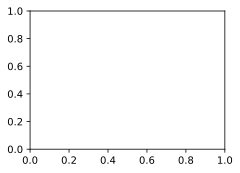

In [8]:
lr, num_epochs, batch_size = 0.05, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size, resize=224)
d2l.train_ch6(net_train, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())